# MTA Project 2: NYPD Arrests and Subway Station Locations

In [1]:
import pandas as pd

from sqlalchemy import create_engine

engine = create_engine("sqlite:///NYPD_arrests.db")

#engine contains details about the database
engine.table_names()

<ipython-input-1-d967c56e8ae7>:8: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['NYPD_Arrests_Data']

In [2]:
arrests = pd.read_sql('SELECT * FROM NYPD_Arrests_Data WHERE LAW_CODE = "PL 1651503" AND ARREST_DATE LIKE "%2019";', engine)
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ARREST_KEY         3594 non-null   int64 
 1   ARREST_DATE        3594 non-null   object
 2   PD_CD              3594 non-null   object
 3   PD_DESC            3594 non-null   object
 4   KY_CD              3594 non-null   object
 5   OFNS_DESC          3594 non-null   object
 6   LAW_CODE           3594 non-null   object
 7   LAW_CAT_CD         3594 non-null   object
 8   ARREST_BORO        3594 non-null   object
 9   ARREST_PRECINCT    3594 non-null   int64 
 10  JURISDICTION_CODE  3594 non-null   int64 
 11  AGE_GROUP          3594 non-null   object
 12  PERP_SEX           3594 non-null   object
 13  PERP_RACE          3594 non-null   object
 14  X_COORD_CD         3594 non-null   object
 15  Y_COORD_CD         3594 non-null   object
 16  Latitude           3594 non-null   object


In [3]:
arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,194556724,03/11/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,73,1,25-44,M,BLACK,1009519,180676,40.662562754000078,-73.908921118999956,POINT (-73.90892111899996 40.66256275400008)
1,193088154,02/02/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,B,49,0,25-44,F,WHITE,1027120,248565,40.84883271700005,-73.845046813999943,POINT (-73.84504681399994 40.84883271700005)
2,193173213,02/05/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,78,1,25-44,M,WHITE HISPANIC,990502,188496,40.684060750000071,-73.977459291999935,POINT (-73.97745929199993 40.68406075000007)
3,192365846,01/16/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,B,44,0,45-64,M,BLACK,1004749,240880,40.827819901000055,-73.925930755999957,POINT (-73.92593075599996 40.827819901000055)
4,194001247,02/26/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,84,1,<18,M,BLACK,987952,195435,40.703108136000026,-73.986649734999958,POINT (-73.98664973499996 40.703108136000026)


In [4]:
arrests['DATE'] = pd.to_datetime(arrests.ARREST_DATE)
arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,DATE
0,194556724,03/11/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,73,1,25-44,M,BLACK,1009519,180676,40.662562754000078,-73.908921118999956,POINT (-73.90892111899996 40.66256275400008),2019-03-11
1,193088154,02/02/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,B,49,0,25-44,F,WHITE,1027120,248565,40.84883271700005,-73.845046813999943,POINT (-73.84504681399994 40.84883271700005),2019-02-02
2,193173213,02/05/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,78,1,25-44,M,WHITE HISPANIC,990502,188496,40.684060750000071,-73.977459291999935,POINT (-73.97745929199993 40.68406075000007),2019-02-05
3,192365846,01/16/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,B,44,0,45-64,M,BLACK,1004749,240880,40.827819901000055,-73.925930755999957,POINT (-73.92593075599996 40.827819901000055),2019-01-16
4,194001247,02/26/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,84,1,<18,M,BLACK,987952,195435,40.703108136000026,-73.986649734999958,POINT (-73.98664973499996 40.703108136000026),2019-02-26


In [5]:
arrests['YEAR'] = arrests.DATE.dt.year
arrests['MONTH'] = arrests.DATE.dt.month
#converting latitude and longitude to float type
arrests['Latitude'] = arrests.Latitude.astype('float')
arrests['Longitude'] = arrests.Longitude.astype('float')
arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,DATE,YEAR,MONTH
0,194556724,03/11/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,73,...,M,BLACK,1009519,180676,40.662563,-73.908921,POINT (-73.90892111899996 40.66256275400008),2019-03-11,2019,3
1,193088154,02/02/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,B,49,...,F,WHITE,1027120,248565,40.848833,-73.845047,POINT (-73.84504681399994 40.84883271700005),2019-02-02,2019,2
2,193173213,02/05/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,78,...,M,WHITE HISPANIC,990502,188496,40.684061,-73.977459,POINT (-73.97745929199993 40.68406075000007),2019-02-05,2019,2
3,192365846,01/16/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,B,44,...,M,BLACK,1004749,240880,40.827820,-73.925931,POINT (-73.92593075599996 40.827819901000055),2019-01-16,2019,1
4,194001247,02/26/2019,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,K,84,...,M,BLACK,987952,195435,40.703108,-73.986650,POINT (-73.98664973499996 40.703108136000026),2019-02-26,2019,2


In [6]:
#filtering to find arrests that occurred September-December of 2019
arrests_q4 = arrests.loc[(arrests['YEAR'] == 2019) & (arrests['MONTH'] >= 9)]
arrests_q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 16 to 3593
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ARREST_KEY         895 non-null    int64         
 1   ARREST_DATE        895 non-null    object        
 2   PD_CD              895 non-null    object        
 3   PD_DESC            895 non-null    object        
 4   KY_CD              895 non-null    object        
 5   OFNS_DESC          895 non-null    object        
 6   LAW_CODE           895 non-null    object        
 7   LAW_CAT_CD         895 non-null    object        
 8   ARREST_BORO        895 non-null    object        
 9   ARREST_PRECINCT    895 non-null    int64         
 10  JURISDICTION_CODE  895 non-null    int64         
 11  AGE_GROUP          895 non-null    object        
 12  PERP_SEX           895 non-null    object        
 13  PERP_RACE          895 non-null    object        
 14  X_COORD_

In [7]:
#cleaning up the dataset
arrests_q4 = arrests_q4.drop([
    'ARREST_DATE',
    'PD_CD',
    'PD_DESC',
    'KY_CD',
    'X_COORD_CD',
    'Y_COORD_CD',
    'OFNS_DESC',
    'LAW_CODE',
    'LAW_CAT_CD',
    'JURISDICTION_CODE'], axis = 1)
arrests_q4.head()

,ARREST_KEY,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat,DATE,YEAR,MONTH
16,203133786,B,44,18-24,M,BLACK,40.840234,-73.917684,POINT (-73.91768411399994 40.840234138000035),2019-10-01,2019,10
46,204137894,M,23,25-44,M,WHITE HISPANIC,40.795130,-73.944180,POINT (-73.94418046199996 40.79512954900008),2019-10-24,2019,10
72,202979595,M,7,18-24,F,BLACK,40.721548,-73.988778,POINT (-73.98877814499997 40.721547677000046),2019-09-27,2019,9
74,204287901,K,77,45-64,M,BLACK HISPANIC,40.668959,-73.933890,POINT (-73.93388987699996 40.66895868000006),2019-10-27,2019,10
76,202030238,Q,114,18-24,F,BLACK,40.771976,-73.907140,POINT (-73.90713960599999 40.77197576900005),2019-09-05,2019,9


In [8]:
#checking for missing values
arrests_q4[arrests_q4.Latitude.isna()]
arrests_q4[arrests_q4.Longitude.isna()]

,ARREST_KEY,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat,DATE,YEAR,MONTH


In [9]:
#checking for duplicates
arrests.ARREST_KEY.nunique()
#number of unique arrest keys matches number of rows in dataframe

3594

In [10]:
#didn't feel like using SQL alchemy for this one, hope that's OK!
stations = pd.read_csv('L_station_locations.csv')
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StationName       32 non-null     object 
 1   StationLatitude   32 non-null     float64
 2   StationLongitude  32 non-null     float64
 3   StationLocation   32 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [11]:
stations.StationName.unique()

array(['Union Square', '1st Av', '3rd Av', '6th Av', '8th Av',
       'Atlantic Av', 'Bedford Av', 'Bushwick Av',
       'Canarsie - Rockaway Parkway', 'DeKalb Av', 'East 105th St',
       'Graham Av', 'Grand St', 'Halsey St', 'Jefferson St', 'Livonia Av',
       'Lorimer St', 'Montrose Av', 'Morgan Av', 'Myrtle Av',
       'New Lots Av', 'Sutter Av', 'Wilson Av', '14th St',
       'Metropolitan Av', 'Broadway Junction-East New York',
       '14th St-Union Square'], dtype=object)

In [12]:
#cleaning the stations dataframe--renaming the different 14th St stations to reflect their actual stations
stations.loc[(stations['StationName'] == '14th St') & (stations['StationLocation'] == "(40.738228, -73.996209)"), 'StationName'] = '6th Av'
stations.loc[(stations['StationName'] == '14th St') & (stations['StationLocation'] == "(40.740893, -74.00169)"), 'StationName'] = '8th Av'
stations.loc[(stations['StationName'] == '14th St') & (stations['StationLocation'] == "(40.737826, -74.000201)"), 'StationName'] = '6th Av'
stations.StationName.unique()

array(['Union Square', '1st Av', '3rd Av', '6th Av', '8th Av',
       'Atlantic Av', 'Bedford Av', 'Bushwick Av',
       'Canarsie - Rockaway Parkway', 'DeKalb Av', 'East 105th St',
       'Graham Av', 'Grand St', 'Halsey St', 'Jefferson St', 'Livonia Av',
       'Lorimer St', 'Montrose Av', 'Morgan Av', 'Myrtle Av',
       'New Lots Av', 'Sutter Av', 'Wilson Av', 'Metropolitan Av',
       'Broadway Junction-East New York', '14th St-Union Square'],
      dtype=object)

In [13]:
## Find station name of each arrest
## if Latitude & Longitude of Arrest are similar to Lat & Long of station, add station name to column. 

stations['GPS'] = list(zip(stations.StationLatitude, stations.StationLongitude))
station_dict = stations.set_index('StationName')['GPS'].to_dict()

def find_station(row, mapper):
    for k, v in mapper.items():
        if abs(row['Latitude'] - v[0]) <= 0.009 and \
           abs(row['Longitude'] - v[1]) <= 0.009:
            return k
    else:
        return None

arrests_q4['STATION'] = arrests_q4.apply(find_station, mapper=station_dict, axis=1)

In [14]:
#cleaning up station names
stations.loc[stations['StationName'] == '14th St-Union Square', 'StationName'] = 'Union Square'
stations['StationName'] = stations['StationName'].str.upper()


In [15]:
stations.to_excel("station_GPS.xlsx", sheet_name='station_GPS')

In [16]:
stations.head()

,StationName,StationLatitude,StationLongitude,StationLocation,GPS
0,UNION SQUARE,40.735736,-73.990568,"(40.735736, -73.990568)","(40.735736, -73.990568)"
1,1ST AV,40.730953,-73.981628,"(40.730953, -73.981628)","(40.730953, -73.981628)"
2,3RD AV,40.732849,-73.986122,"(40.732849, -73.986122)","(40.732849, -73.986122)"
3,6TH AV,40.737335,-73.996786,"(40.737335, -73.996786)","(40.737335, -73.996786)"
4,8TH AV,40.739777,-74.002578,"(40.739777, -74.002578)","(40.739777, -74.002578)"


In [17]:
arrests_q4.STATION.unique()

array([None, 'Halsey St', 'Union Square', 'Atlantic Av', 'DeKalb Av',
       'Livonia Av', 'East 105th St', 'Montrose Av', 'Jefferson St',
       'Broadway Junction-East New York', 'Grand St', '6th Av',
       'Bedford Av', '1st Av', 'Graham Av'], dtype=object)

In [18]:
L_stations = [
    '8th Av',
    '6th Av',
    'Union Square',
    '3rd Av',
    '1st Av',
    'Bedford Av',
    'Lorimer St', 
    'Graham Av', 
    'Grand St',
    'Montrose Av',
    'Morgan Av',
    'Jefferson St',
    'DeKalb Av',
    'Myrtle Av',
    'Halsey St',
    'Wilson Av',
    'Bushwick Av',
    'Broadway Jct',
    'Atlantic Av',
    'Sutter Av',
    'Livonia Av',
    'New Lots Av',
    'East 105th St',
    'Canarsie']

station_order = [x.upper() for x in L_stations]

In [19]:
#renaming some lengthy stations
arrests_q4.loc[arrests_q4['STATION']=='Broadway Junction-East New York', 'STATION'] = 'Broadway Jct'
arrests_q4['STATION'] = arrests_q4['STATION'].str.upper()
arrests_q4.head()


,ARREST_KEY,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat,DATE,YEAR,MONTH,STATION
16,203133786,B,44,18-24,M,BLACK,40.840234,-73.917684,POINT (-73.91768411399994 40.840234138000035),2019-10-01,2019,10,None
46,204137894,M,23,25-44,M,WHITE HISPANIC,40.795130,-73.944180,POINT (-73.94418046199996 40.79512954900008),2019-10-24,2019,10,None
72,202979595,M,7,18-24,F,BLACK,40.721548,-73.988778,POINT (-73.98877814499997 40.721547677000046),2019-09-27,2019,9,None
74,204287901,K,77,45-64,M,BLACK HISPANIC,40.668959,-73.933890,POINT (-73.93388987699996 40.66895868000006),2019-10-27,2019,10,None
76,202030238,Q,114,18-24,F,BLACK,40.771976,-73.907140,POINT (-73.90713960599999 40.77197576900005),2019-09-05,2019,9,None


In [20]:
arrests_q4 = arrests_q4.drop(arrests_q4[arrests_q4['STATION'].isna()].index)
arrests_q4.head()

,ARREST_KEY,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat,DATE,YEAR,MONTH,STATION
81,204489262,Q,104,25-44,M,BLACK,40.695941,-73.904667,POINT (-73.90466704699998 40.69594126800007),2019-11-06,2019,11,HALSEY ST
104,201899043,M,13,18-24,M,BLACK,40.737203,-73.983273,POINT (-73.98327259799999 40.737203099000055),2019-09-03,2019,9,UNION SQUARE
153,202476687,M,13,18-24,M,BLACK,40.737203,-73.983273,POINT (-73.98327259799999 40.737203099000055),2019-09-16,2019,9,UNION SQUARE
283,203950017,K,73,25-44,F,BLACK,40.668280,-73.902627,POINT (-73.90262664599999 40.668280465000066),2019-10-20,2019,10,ATLANTIC AV
348,203384098,K,83,25-44,F,BLACK,40.707036,-73.923591,POINT (-73.92359067199999 40.70703601300005),2019-10-07,2019,10,DEKALB AV


In [21]:
arrests_q4_station = arrests_q4.groupby(['STATION','MONTH','AGE_GROUP','PERP_SEX','PERP_RACE']).ARREST_KEY.count().reset_index()
arrests_q4_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATION     95 non-null     object
 1   MONTH       95 non-null     int64 
 2   AGE_GROUP   95 non-null     object
 3   PERP_SEX    95 non-null     object
 4   PERP_RACE   95 non-null     object
 5   ARREST_KEY  95 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 4.6+ KB


In [22]:
arrests_q4_station.rename(columns={'ARREST_KEY':'ARRESTS'}, inplace=True)

arrests_q4_station.STATION.unique()

array(['1ST AV', '6TH AV', 'ATLANTIC AV', 'BEDFORD AV', 'BROADWAY JCT',
       'DEKALB AV', 'EAST 105TH ST', 'GRAHAM AV', 'GRAND ST', 'HALSEY ST',
       'JEFFERSON ST', 'LIVONIA AV', 'MONTROSE AV', 'UNION SQUARE'],
      dtype=object)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '1ST AV'),
  Text(1, 0, '6TH AV'),
  Text(2, 0, 'ATLANTIC AV'),
  Text(3, 0, 'BEDFORD AV'),
  Text(4, 0, 'BROADWAY JCT'),
  Text(5, 0, 'DEKALB AV'),
  Text(6, 0, 'EAST 105TH ST'),
  Text(7, 0, 'GRAHAM AV'),
  Text(8, 0, 'GRAND ST'),
  Text(9, 0, 'HALSEY ST'),
  Text(10, 0, 'JEFFERSON ST'),
  Text(11, 0, 'LIVONIA AV'),
  Text(12, 0, 'MONTROSE AV'),
  Text(13, 0, 'UNION SQUARE')])

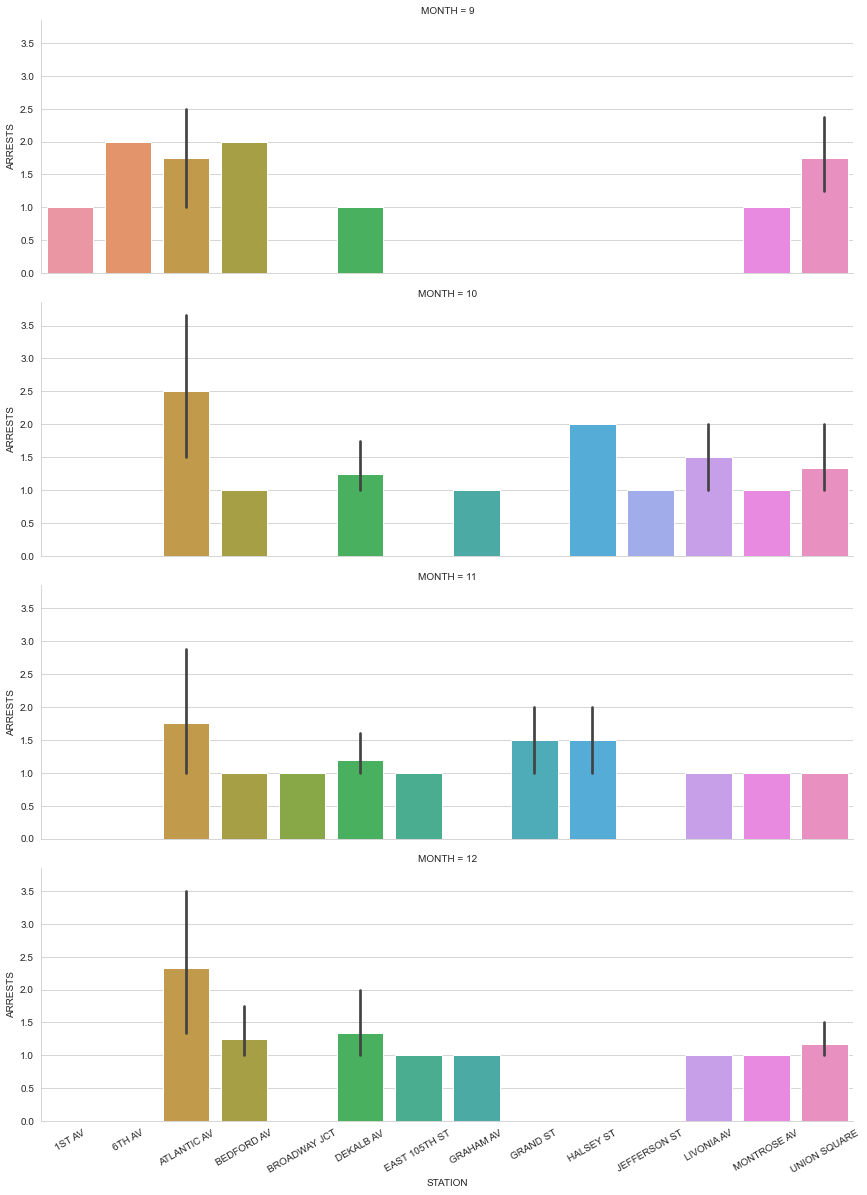

In [24]:
sns.set_style('whitegrid')
station_arrest_graph = sns.catplot(x='STATION', y='ARRESTS', row='MONTH', data=arrests_q4_station, kind='bar', height=4, aspect=3);
plt.xticks(rotation=30)

In [25]:
arrests_monthly = arrests_q4_station.groupby(['STATION','MONTH']).ARRESTS.sum().reset_index()
arrests_monthly.head()

,STATION,MONTH,ARRESTS
0,1ST AV,9,1
1,6TH AV,9,2
2,ATLANTIC AV,9,7
3,ATLANTIC AV,10,15
4,ATLANTIC AV,11,14


In [26]:
arrests_race = arrests_q4_station.groupby(['STATION','PERP_RACE']).ARRESTS.sum().reset_index()
arrests_race.head()

,STATION,PERP_RACE,ARRESTS
0,1ST AV,AMERICAN INDIAN/ALASKAN NATIVE,1
1,6TH AV,BLACK,2
2,ATLANTIC AV,BLACK,33
3,ATLANTIC AV,BLACK HISPANIC,3
4,ATLANTIC AV,WHITE,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '8TH AV'),
  Text(1, 0, '6TH AV'),
  Text(2, 0, 'UNION SQUARE'),
  Text(3, 0, '3RD AV'),
  Text(4, 0, '1ST AV'),
  Text(5, 0, 'BEDFORD AV'),
  Text(6, 0, 'LORIMER ST'),
  Text(7, 0, 'GRAHAM AV'),
  Text(8, 0, 'GRAND ST'),
  Text(9, 0, 'MONTROSE AV'),
  Text(10, 0, 'MORGAN AV'),
  Text(11, 0, 'JEFFERSON ST'),
  Text(12, 0, 'DEKALB AV'),
  Text(13, 0, 'MYRTLE AV'),
  Text(14, 0, 'HALSEY ST'),
  Text(15, 0, 'WILSON AV'),
  Text(16, 0, 'BUSHWICK AV'),
  Text(17, 0, 'BROADWAY JCT'),
  Text(18, 0, 'ATLANTIC AV'),
  Text(19, 0, 'SUTTER AV'),
  Text(20, 0, 'LIVONIA AV'),
  Text(21, 0, 'NEW LOTS AV'),
  Text(22, 0, 'EAST 105TH ST'),
  Text(23, 0, 'CANARSIE')])

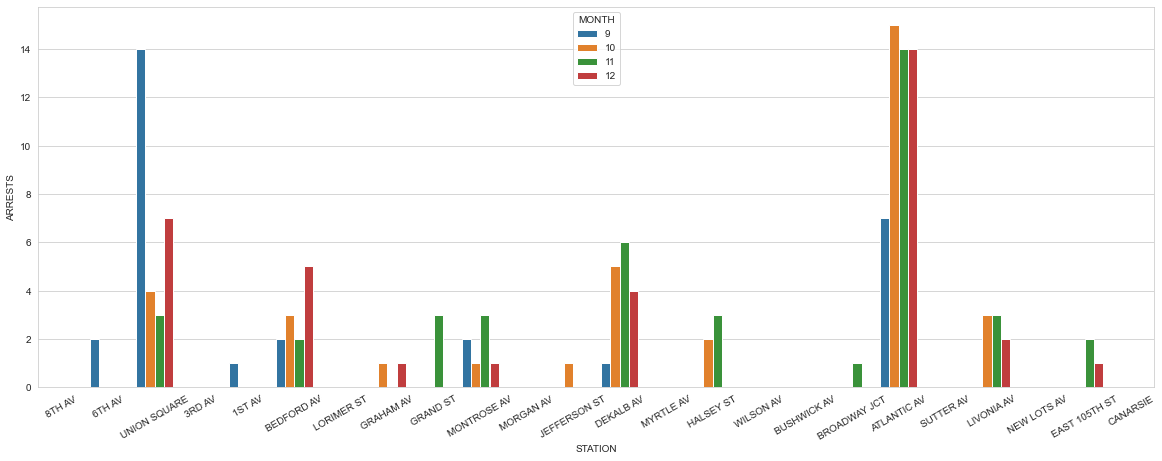

In [27]:
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
arrests_monthly_graph = sns.barplot(x='STATION', y='ARRESTS', hue='MONTH', ax=ax, data=arrests_monthly, order=station_order)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '8TH AV'),
  Text(1, 0, '6TH AV'),
  Text(2, 0, 'UNION SQUARE'),
  Text(3, 0, '3RD AV'),
  Text(4, 0, '1ST AV'),
  Text(5, 0, 'BEDFORD AV'),
  Text(6, 0, 'LORIMER ST'),
  Text(7, 0, 'GRAHAM AV'),
  Text(8, 0, 'GRAND ST'),
  Text(9, 0, 'MONTROSE AV'),
  Text(10, 0, 'MORGAN AV'),
  Text(11, 0, 'JEFFERSON ST'),
  Text(12, 0, 'DEKALB AV'),
  Text(13, 0, 'MYRTLE AV'),
  Text(14, 0, 'HALSEY ST'),
  Text(15, 0, 'WILSON AV'),
  Text(16, 0, 'BUSHWICK AV'),
  Text(17, 0, 'BROADWAY JCT'),
  Text(18, 0, 'ATLANTIC AV'),
  Text(19, 0, 'SUTTER AV'),
  Text(20, 0, 'LIVONIA AV'),
  Text(21, 0, 'NEW LOTS AV'),
  Text(22, 0, 'EAST 105TH ST'),
  Text(23, 0, 'CANARSIE')])

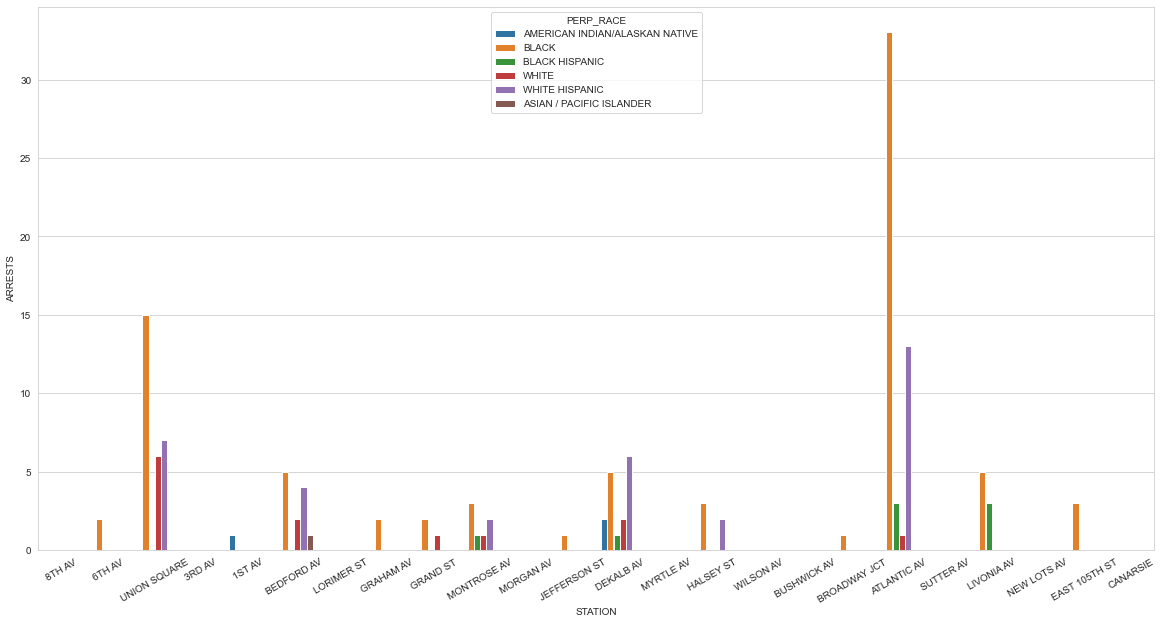

In [28]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
arrests_race_graph = sns.barplot(x='STATION', y='ARRESTS', hue='PERP_RACE', ax=ax, data=arrests_race, order=station_order)
plt.xticks(rotation=30)

In [29]:
arrests_race_total = arrests_q4_station.groupby(['PERP_RACE']).ARRESTS.sum().reset_index()
arrests_race_total

,PERP_RACE,ARRESTS
0,AMERICAN INDIAN/ALASKAN NATIVE,3
1,ASIAN / PACIFIC ISLANDER,1
2,BLACK,80
3,BLACK HISPANIC,8
4,WHITE,13
5,WHITE HISPANIC,34


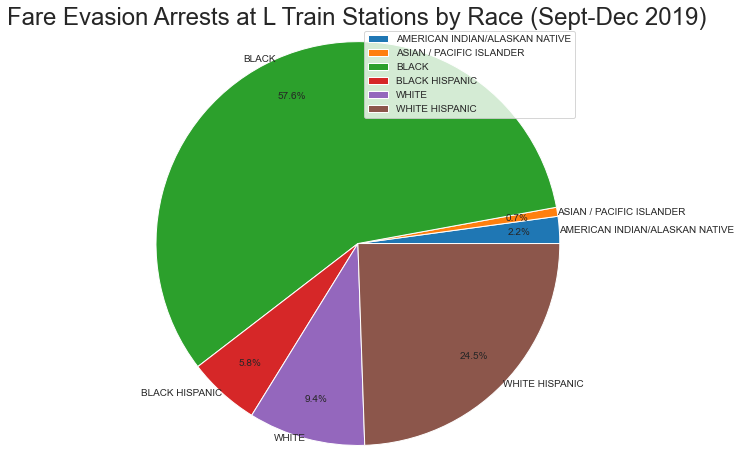

In [30]:
plt.figure(figsize=(8,8))
plt.pie(arrests_race_total['ARRESTS'], 
        labels = arrests_race_total['PERP_RACE'], 
        autopct='%1.1f%%', 
        pctdistance=0.8, 
        labeldistance=1,
       radius=1)
plt.title('Fare Evasion Arrests at L Train Stations by Race (Sept-Dec 2019)', fontsize='24', loc="center", pad=1)
plt.axis('equal')
plt.legend(loc ='upper right')
plt.savefig('arrests_race_pie.png')

In [31]:
arrests_q4_station_total = arrests_q4_station.groupby('STATION').ARRESTS.sum().reset_index()
arrests_q4_station_total.head()

,STATION,ARRESTS
0,1ST AV,1
1,6TH AV,2
2,ATLANTIC AV,50
3,BEDFORD AV,12
4,BROADWAY JCT,1


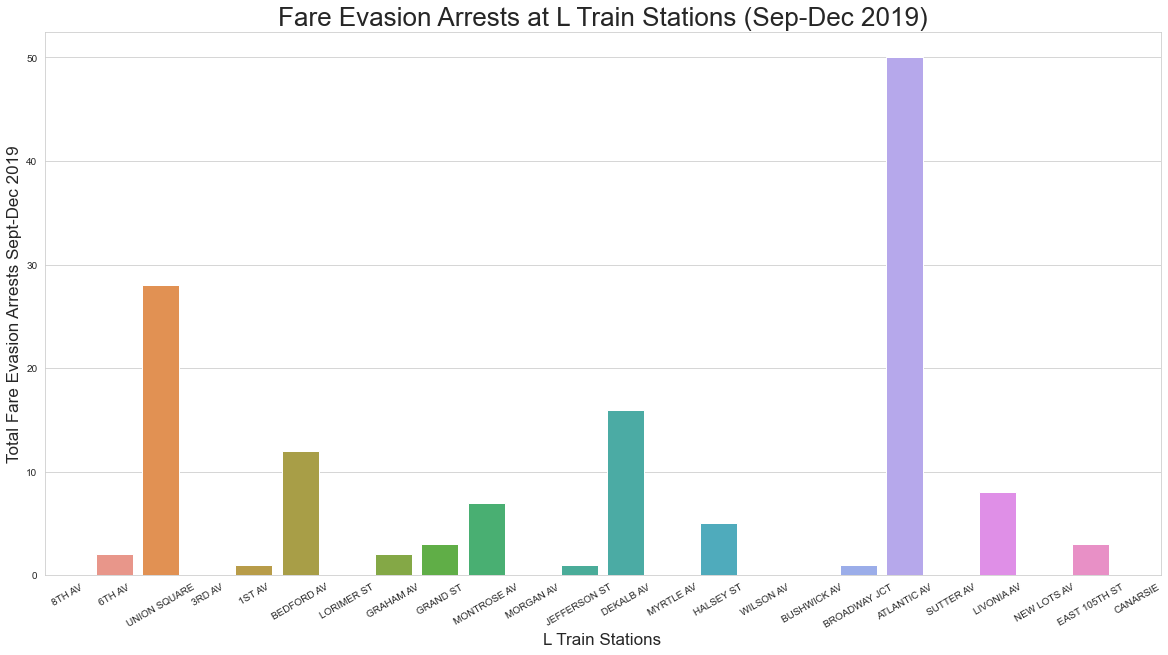

In [32]:
sns.set_style('whitegrid')
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
arrests_graph = sns.barplot(x='STATION', y='ARRESTS', data=arrests_q4_station_total, order = station_order)
plt.xticks(rotation=30)
plt.xlabel('L Train Stations', fontsize='17', horizontalalignment='center')
plt.ylabel('Total Fare Evasion Arrests Sept-Dec 2019', fontsize='17', horizontalalignment='center')
plt.title('Fare Evasion Arrests at L Train Stations (Sep-Dec 2019)', fontsize='26')
plt.savefig('arrests_graph.png')

In [33]:
arrests_q4_geo = arrests_q4[arrests_q4['STATION']!='None']
arrests_q4_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 81 to 3593
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ARREST_KEY       139 non-null    int64         
 1   ARREST_BORO      139 non-null    object        
 2   ARREST_PRECINCT  139 non-null    int64         
 3   AGE_GROUP        139 non-null    object        
 4   PERP_SEX         139 non-null    object        
 5   PERP_RACE        139 non-null    object        
 6   Latitude         139 non-null    float64       
 7   Longitude        139 non-null    float64       
 8   Lon_Lat          139 non-null    object        
 9   DATE             139 non-null    datetime64[ns]
 10  YEAR             139 non-null    int64         
 11  MONTH            139 non-null    int64         
 12  STATION          139 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 15.2+ KB


<AxesSubplot:xlabel='StationLongitude', ylabel='StationLatitude'>

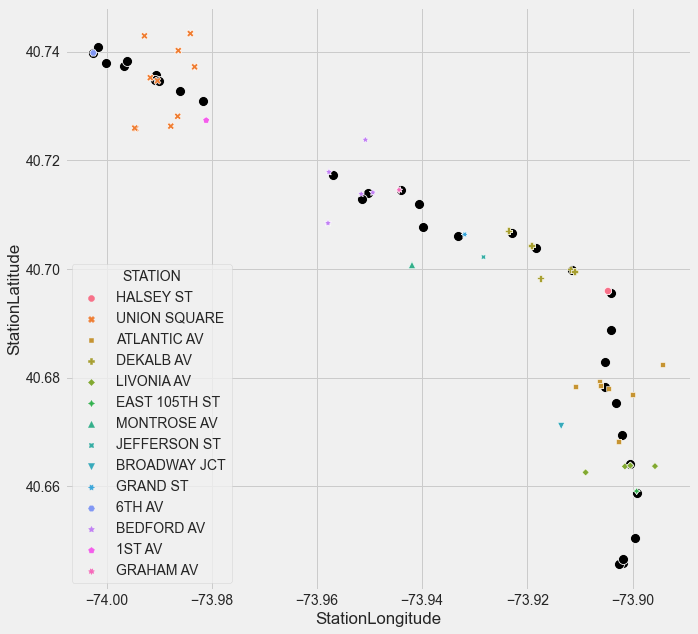

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
sns.scatterplot(x='StationLongitude', y='StationLatitude', s=100, data=stations, color='black')
sns.scatterplot(x='Longitude', y='Latitude', s=50, hue='STATION', style='STATION', data=arrests_q4_geo)

In [35]:
arrests_q4.to_excel("arrests_geo.xlsx", sheet_name='arrests_geo')

In [36]:
arrests_q4_station_total.to_excel('arrests_total.xlsx', sheet_name='arrests_total')